[View in Colaboratory](https://colab.research.google.com/github/zzune/KerasBasic/blob/master/Chapter3_3_callback.ipynb)

In [1]:
# 0. 사용할 패키지 불러오기
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 사용자 정의 히스토리 클래스 정의
class CustomHistory(keras.callbacks.Callback):
  def init(self):
    self.train_loss = []
    self.val_loss = []
    self.train_acc = []
    self.val_acc = []
    
  def on_epoch_end(self, batch, logs={}):
    self.train_loss.append(logs.get('loss'))
    self.val_loss.append(logs.get('val_loss'))
    self.train_acc.append(logs.get('acc'))
    self.val_acc.append(logs.get('val_acc'))

Using TensorFlow backend.


In [0]:
# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리
x_train = x_train.reshape(50000, 784).astype('float32') / 255.0
x_val = x_val.reshape(10000, 784).astype('float32') / 255.0
x_test = x_val.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋과 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)
x_train = x_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
x_val = x_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

# 라벨데이터 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [0]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [0]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [5]:
# 4. 모델 학습시키기
custom_hist = CustomHistory()
custom_hist.init()

for epoch_idx in range(1000):
  print('epochs : ' + str(epoch_idx))
  model.fit(x_train, y_train, epochs=1, batch_size=10, validation_data=(x_val, y_val), callbacks=[custom_hist])

epochs : 0
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 243us/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
epochs : 1
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 156us/step - loss: 2.2067 - acc: 0.1786 - val_loss: 2.1906 - val_acc: 0.1800
epochs : 2
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 149us/step - loss: 2.1733 - acc: 0.1829 - val_loss: 2.1640 - val_acc: 0.1833
epochs : 3
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 160us/step - loss: 2.1446 - acc: 0.1957 - val_loss: 2.1409 - val_acc: 0.1833
epochs : 4
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 160us/step - loss: 2.1186 - acc: 0.1929 - val_loss: 2.1151 - val_acc: 0.2000
epochs : 5
Train on 700 samples, validate on 300 s

epochs : 18
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 143us/step - loss: 1.9238 - acc: 0.2314 - val_loss: 1.9467 - val_acc: 0.2033
epochs : 19
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 151us/step - loss: 1.9156 - acc: 0.2357 - val_loss: 1.9393 - val_acc: 0.1967
epochs : 20
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 157us/step - loss: 1.9101 - acc: 0.2357 - val_loss: 1.9347 - val_acc: 0.2033
epochs : 21
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 166us/step - loss: 1.9026 - acc: 0.2400 - val_loss: 1.9289 - val_acc: 0.2133
epochs : 22
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 181us/step - loss: 1.8959 - acc: 0.2357 - val_loss: 1.9248 - val_acc: 0.1967
epochs : 23
Train on 700 samples, validate on

epochs : 36
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 177us/step - loss: 1.8268 - acc: 0.2386 - val_loss: 1.8754 - val_acc: 0.2067
epochs : 37
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 169us/step - loss: 1.8223 - acc: 0.2414 - val_loss: 1.8756 - val_acc: 0.1967
epochs : 38
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 164us/step - loss: 1.8192 - acc: 0.2386 - val_loss: 1.8700 - val_acc: 0.2100
epochs : 39
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 165us/step - loss: 1.8158 - acc: 0.2329 - val_loss: 1.8666 - val_acc: 0.1967
epochs : 40
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 176us/step - loss: 1.8113 - acc: 0.2429 - val_loss: 1.8681 - val_acc: 0.2000
epochs : 41
Train on 700 samples, validate on

700/700 [==============================] - 0s 166us/step - loss: 1.7695 - acc: 0.2571 - val_loss: 1.8397 - val_acc: 0.2000
epochs : 55
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 173us/step - loss: 1.7672 - acc: 0.2557 - val_loss: 1.8381 - val_acc: 0.2233
epochs : 56
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 167us/step - loss: 1.7649 - acc: 0.2629 - val_loss: 1.8399 - val_acc: 0.2133
epochs : 57
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 165us/step - loss: 1.7620 - acc: 0.2657 - val_loss: 1.8395 - val_acc: 0.2167
epochs : 58
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 169us/step - loss: 1.7591 - acc: 0.2586 - val_loss: 1.8333 - val_acc: 0.2200
epochs : 59
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 164us/step - loss: 1.7309 - acc: 0.2986 - val_loss: 1.8218 - val_acc: 0.2133
epochs : 73
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 163us/step - loss: 1.7284 - acc: 0.2914 - val_loss: 1.8295 - val_acc: 0.2100
epochs : 74
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 157us/step - loss: 1.7258 - acc: 0.2829 - val_loss: 1.8154 - val_acc: 0.2733
epochs : 75
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 177us/step - loss: 1.7256 - acc: 0.2957 - val_loss: 1.8182 - val_acc: 0.2233
epochs : 76
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 170us/step - loss: 1.7243 - acc: 0.2943 - val_loss: 1.8212 - val_acc: 0.2233
epochs : 77
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 172us/step - loss: 1.7009 - acc: 0.3057 - val_loss: 1.8224 - val_acc: 0.2133
epochs : 91
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 160us/step - loss: 1.6996 - acc: 0.2857 - val_loss: 1.8136 - val_acc: 0.2467
epochs : 92
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 165us/step - loss: 1.6980 - acc: 0.3014 - val_loss: 1.8222 - val_acc: 0.2167
epochs : 93
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 168us/step - loss: 1.6978 - acc: 0.2886 - val_loss: 1.8158 - val_acc: 0.2067
epochs : 94
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 156us/step - loss: 1.6952 - acc: 0.2986 - val_loss: 1.8205 - val_acc: 0.2300
epochs : 95
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 160us/step - loss: 1.6778 - acc: 0.3143 - val_loss: 1.8140 - val_acc: 0.2100
epochs : 108
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 153us/step - loss: 1.6773 - acc: 0.3000 - val_loss: 1.8158 - val_acc: 0.2300
epochs : 109
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 157us/step - loss: 1.6759 - acc: 0.3057 - val_loss: 1.8171 - val_acc: 0.2500
epochs : 110
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 177us/step - loss: 1.6744 - acc: 0.3186 - val_loss: 1.8148 - val_acc: 0.2300
epochs : 111
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 157us/step - loss: 1.6722 - acc: 0.3229 - val_loss: 1.8304 - val_acc: 0.2100
epochs : 112
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epochs : 125
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 165us/step - loss: 1.6591 - acc: 0.3314 - val_loss: 1.8196 - val_acc: 0.2233
epochs : 126
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 163us/step - loss: 1.6535 - acc: 0.3357 - val_loss: 1.8353 - val_acc: 0.2267
epochs : 127
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 173us/step - loss: 1.6582 - acc: 0.3243 - val_loss: 1.8224 - val_acc: 0.2233
epochs : 128
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 168us/step - loss: 1.6546 - acc: 0.3143 - val_loss: 1.8297 - val_acc: 0.2500
epochs : 129
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 163us/step - loss: 1.6528 - acc: 0.3314 - val_loss: 1.8206 - val_acc: 0.2700
epochs : 130
Train on 700 samples, valid

epochs : 143
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 164us/step - loss: 1.6399 - acc: 0.3229 - val_loss: 1.8218 - val_acc: 0.2167
epochs : 144
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 173us/step - loss: 1.6391 - acc: 0.3243 - val_loss: 1.8219 - val_acc: 0.2367
epochs : 145
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 158us/step - loss: 1.6385 - acc: 0.3329 - val_loss: 1.8209 - val_acc: 0.2600
epochs : 146
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 161us/step - loss: 1.6377 - acc: 0.3357 - val_loss: 1.8283 - val_acc: 0.2267
epochs : 147
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 174us/step - loss: 1.6367 - acc: 0.3343 - val_loss: 1.8267 - val_acc: 0.2233
epochs : 148
Train on 700 samples, valid

epochs : 161
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 172us/step - loss: 1.6256 - acc: 0.3343 - val_loss: 1.8419 - val_acc: 0.2467
epochs : 162
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 193us/step - loss: 1.6241 - acc: 0.3343 - val_loss: 1.8280 - val_acc: 0.2300
epochs : 163
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 184us/step - loss: 1.6217 - acc: 0.3471 - val_loss: 1.8376 - val_acc: 0.2167
epochs : 164
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 169us/step - loss: 1.6232 - acc: 0.3329 - val_loss: 1.8348 - val_acc: 0.2200
epochs : 165
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 167us/step - loss: 1.6198 - acc: 0.3414 - val_loss: 1.8351 - val_acc: 0.2200
epochs : 166
Train on 700 samples, valid

700/700 [==============================] - 0s 172us/step - loss: 1.6121 - acc: 0.3443 - val_loss: 1.8366 - val_acc: 0.2167
epochs : 179
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 173us/step - loss: 1.6107 - acc: 0.3414 - val_loss: 1.8403 - val_acc: 0.2200
epochs : 180
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 163us/step - loss: 1.6095 - acc: 0.3557 - val_loss: 1.8483 - val_acc: 0.2300
epochs : 181
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 172us/step - loss: 1.6106 - acc: 0.3443 - val_loss: 1.8399 - val_acc: 0.2200
epochs : 182
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 163us/step - loss: 1.6099 - acc: 0.3357 - val_loss: 1.8546 - val_acc: 0.2200
epochs : 183
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epochs : 196
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 160us/step - loss: 1.6007 - acc: 0.3443 - val_loss: 1.8484 - val_acc: 0.2233
epochs : 197
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 169us/step - loss: 1.5992 - acc: 0.3386 - val_loss: 1.8471 - val_acc: 0.2200
epochs : 198
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 166us/step - loss: 1.5983 - acc: 0.3414 - val_loss: 1.8488 - val_acc: 0.2200
epochs : 199
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 168us/step - loss: 1.5972 - acc: 0.3429 - val_loss: 1.8608 - val_acc: 0.2333
epochs : 200
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 175us/step - loss: 1.5982 - acc: 0.3500 - val_loss: 1.8496 - val_acc: 0.2267
epochs : 201
Train on 700 samples, valid

epochs : 214
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 165us/step - loss: 1.5886 - acc: 0.3457 - val_loss: 1.8486 - val_acc: 0.2600
epochs : 215
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 164us/step - loss: 1.5881 - acc: 0.3471 - val_loss: 1.8537 - val_acc: 0.2300
epochs : 216
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 171us/step - loss: 1.5869 - acc: 0.3429 - val_loss: 1.8592 - val_acc: 0.2267
epochs : 217
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 171us/step - loss: 1.5870 - acc: 0.3529 - val_loss: 1.8535 - val_acc: 0.2167
epochs : 218
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 189us/step - loss: 1.5856 - acc: 0.3471 - val_loss: 1.8583 - val_acc: 0.2133
epochs : 219
Train on 700 samples, valid

epochs : 232
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 166us/step - loss: 1.5788 - acc: 0.3500 - val_loss: 1.8698 - val_acc: 0.2200
epochs : 233
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 168us/step - loss: 1.5773 - acc: 0.3486 - val_loss: 1.8762 - val_acc: 0.2200
epochs : 234
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 175us/step - loss: 1.5780 - acc: 0.3414 - val_loss: 1.8749 - val_acc: 0.2233
epochs : 235
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 158us/step - loss: 1.5767 - acc: 0.3529 - val_loss: 1.8801 - val_acc: 0.2300
epochs : 236
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 167us/step - loss: 1.5759 - acc: 0.3586 - val_loss: 1.8716 - val_acc: 0.2200
epochs : 237
Train on 700 samples, valid

epochs : 249
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 175us/step - loss: 1.5689 - acc: 0.3557 - val_loss: 1.8801 - val_acc: 0.2133
epochs : 250
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 177us/step - loss: 1.5699 - acc: 0.3571 - val_loss: 1.8896 - val_acc: 0.2200
epochs : 251
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 165us/step - loss: 1.5688 - acc: 0.3571 - val_loss: 1.8729 - val_acc: 0.2167
epochs : 252
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 177us/step - loss: 1.5676 - acc: 0.3457 - val_loss: 1.8758 - val_acc: 0.2100
epochs : 253
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 163us/step - loss: 1.5674 - acc: 0.3529 - val_loss: 1.8774 - val_acc: 0.2233
epochs : 254
Train on 700 samples, valid

epochs : 267
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 159us/step - loss: 1.5613 - acc: 0.3571 - val_loss: 1.8846 - val_acc: 0.2133
epochs : 268
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 174us/step - loss: 1.5611 - acc: 0.3500 - val_loss: 1.8923 - val_acc: 0.2467
epochs : 269
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 163us/step - loss: 1.5608 - acc: 0.3643 - val_loss: 1.8947 - val_acc: 0.2267
epochs : 270
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 176us/step - loss: 1.5592 - acc: 0.3514 - val_loss: 1.8941 - val_acc: 0.2200
epochs : 271
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 167us/step - loss: 1.5587 - acc: 0.3629 - val_loss: 1.8873 - val_acc: 0.2133
epochs : 272
Train on 700 samples, valid

epochs : 285
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 161us/step - loss: 1.5537 - acc: 0.3657 - val_loss: 1.9067 - val_acc: 0.2200
epochs : 286
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 177us/step - loss: 1.5517 - acc: 0.3614 - val_loss: 1.8896 - val_acc: 0.2367
epochs : 287
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 167us/step - loss: 1.5513 - acc: 0.3700 - val_loss: 1.8937 - val_acc: 0.2233
epochs : 288
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 163us/step - loss: 1.5512 - acc: 0.3700 - val_loss: 1.9021 - val_acc: 0.2400
epochs : 289
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 172us/step - loss: 1.5503 - acc: 0.3586 - val_loss: 1.9046 - val_acc: 0.2267
epochs : 290
Train on 700 samples, valid

700/700 [==============================] - 0s 159us/step - loss: 1.5462 - acc: 0.3671 - val_loss: 1.9073 - val_acc: 0.2267
epochs : 303
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 161us/step - loss: 1.5447 - acc: 0.3586 - val_loss: 1.9066 - val_acc: 0.2200
epochs : 304
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 168us/step - loss: 1.5444 - acc: 0.3586 - val_loss: 1.9080 - val_acc: 0.2200
epochs : 305
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 158us/step - loss: 1.5448 - acc: 0.3586 - val_loss: 1.8967 - val_acc: 0.2300
epochs : 306
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 167us/step - loss: 1.5449 - acc: 0.3657 - val_loss: 1.9123 - val_acc: 0.2233
epochs : 307
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]


Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 175us/step - loss: 1.5385 - acc: 0.3714 - val_loss: 1.9308 - val_acc: 0.2233
epochs : 320
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 202us/step - loss: 1.5380 - acc: 0.3643 - val_loss: 1.9222 - val_acc: 0.2233
epochs : 321
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 173us/step - loss: 1.5373 - acc: 0.3600 - val_loss: 1.9183 - val_acc: 0.2500
epochs : 322
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 163us/step - loss: 1.5377 - acc: 0.3629 - val_loss: 1.9046 - val_acc: 0.2167
epochs : 323
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 174us/step - loss: 1.5373 - acc: 0.3643 - val_loss: 1.9078 - val_acc: 0.2167
epochs : 324
Train on 700 samples, validate on 300 s

epochs : 336
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 177us/step - loss: 1.5327 - acc: 0.3757 - val_loss: 1.9232 - val_acc: 0.2200
epochs : 337
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 171us/step - loss: 1.5318 - acc: 0.3671 - val_loss: 1.9232 - val_acc: 0.2267
epochs : 338
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 166us/step - loss: 1.5307 - acc: 0.3700 - val_loss: 1.9172 - val_acc: 0.2400
epochs : 339
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 179us/step - loss: 1.5321 - acc: 0.3686 - val_loss: 1.9320 - val_acc: 0.2233
epochs : 340
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 175us/step - loss: 1.5292 - acc: 0.3771 - val_loss: 1.9139 - val_acc: 0.2133
epochs : 341
Train on 700 samples, valid

epochs : 354
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 162us/step - loss: 1.5257 - acc: 0.3729 - val_loss: 1.9401 - val_acc: 0.2200
epochs : 355
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 196us/step - loss: 1.5249 - acc: 0.3800 - val_loss: 1.9359 - val_acc: 0.2300
epochs : 356
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 167us/step - loss: 1.5243 - acc: 0.3643 - val_loss: 1.9356 - val_acc: 0.2267
epochs : 357
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 167us/step - loss: 1.5242 - acc: 0.3786 - val_loss: 1.9339 - val_acc: 0.2467
epochs : 358
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 170us/step - loss: 1.5248 - acc: 0.3714 - val_loss: 1.9359 - val_acc: 0.2267
epochs : 359
Train on 700 samples, valid

epochs : 371
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 158us/step - loss: 1.5203 - acc: 0.3714 - val_loss: 1.9531 - val_acc: 0.2167
epochs : 372
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 162us/step - loss: 1.5189 - acc: 0.3714 - val_loss: 1.9454 - val_acc: 0.2200
epochs : 373
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 185us/step - loss: 1.5193 - acc: 0.3729 - val_loss: 1.9465 - val_acc: 0.2400
epochs : 374
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 160us/step - loss: 1.5185 - acc: 0.3800 - val_loss: 1.9563 - val_acc: 0.2200
epochs : 375
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 179us/step - loss: 1.5177 - acc: 0.3814 - val_loss: 1.9641 - val_acc: 0.2233
epochs : 376
Train on 700 samples, valid

epochs : 389
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 165us/step - loss: 1.5133 - acc: 0.3643 - val_loss: 1.9499 - val_acc: 0.2267
epochs : 390
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 157us/step - loss: 1.5126 - acc: 0.3743 - val_loss: 1.9639 - val_acc: 0.2300
epochs : 391
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 177us/step - loss: 1.5128 - acc: 0.3771 - val_loss: 1.9514 - val_acc: 0.2267
epochs : 392
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 172us/step - loss: 1.5118 - acc: 0.3743 - val_loss: 1.9575 - val_acc: 0.2200
epochs : 393
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 200us/step - loss: 1.5119 - acc: 0.3743 - val_loss: 1.9683 - val_acc: 0.2267
epochs : 394
Train on 700 samples, valid

700/700 [==============================] - 0s 160us/step - loss: 1.5076 - acc: 0.3814 - val_loss: 1.9678 - val_acc: 0.2233
epochs : 407
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 176us/step - loss: 1.5075 - acc: 0.3757 - val_loss: 1.9602 - val_acc: 0.2333
epochs : 408
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 164us/step - loss: 1.5066 - acc: 0.3814 - val_loss: 1.9755 - val_acc: 0.2400
epochs : 409
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 163us/step - loss: 1.5063 - acc: 0.3829 - val_loss: 1.9738 - val_acc: 0.2400
epochs : 410
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 176us/step - loss: 1.5048 - acc: 0.3857 - val_loss: 1.9699 - val_acc: 0.2467
epochs : 411
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 171us/step - loss: 1.4987 - acc: 0.3771 - val_loss: 1.9795 - val_acc: 0.2333
epochs : 425
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 166us/step - loss: 1.5003 - acc: 0.3786 - val_loss: 1.9960 - val_acc: 0.2400
epochs : 426
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 162us/step - loss: 1.4989 - acc: 0.3757 - val_loss: 1.9797 - val_acc: 0.2433
epochs : 427
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 167us/step - loss: 1.4982 - acc: 0.3757 - val_loss: 1.9774 - val_acc: 0.2267
epochs : 428
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 165us/step - loss: 1.4985 - acc: 0.3757 - val_loss: 1.9755 - val_acc: 0.2367
epochs : 429
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 164us/step - loss: 1.4934 - acc: 0.3871 - val_loss: 1.9819 - val_acc: 0.2433
epochs : 443
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 184us/step - loss: 1.4928 - acc: 0.3814 - val_loss: 1.9925 - val_acc: 0.2367
epochs : 444
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 167us/step - loss: 1.4921 - acc: 0.3886 - val_loss: 1.9871 - val_acc: 0.2333
epochs : 445
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 176us/step - loss: 1.4926 - acc: 0.3800 - val_loss: 1.9802 - val_acc: 0.2267
epochs : 446
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 164us/step - loss: 1.4915 - acc: 0.3857 - val_loss: 1.9934 - val_acc: 0.2467
epochs : 447
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 159us/step - loss: 1.4881 - acc: 0.3886 - val_loss: 1.9945 - val_acc: 0.2267
epochs : 461
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 170us/step - loss: 1.4865 - acc: 0.3914 - val_loss: 1.9990 - val_acc: 0.2200
epochs : 462
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 162us/step - loss: 1.4858 - acc: 0.3971 - val_loss: 2.0014 - val_acc: 0.2367
epochs : 463
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 176us/step - loss: 1.4866 - acc: 0.3943 - val_loss: 2.0115 - val_acc: 0.2367
epochs : 464
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 176us/step - loss: 1.4876 - acc: 0.3871 - val_loss: 2.0089 - val_acc: 0.2367
epochs : 465
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 159us/step - loss: 1.4825 - acc: 0.3971 - val_loss: 2.0199 - val_acc: 0.2300
epochs : 479
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 161us/step - loss: 1.4820 - acc: 0.3900 - val_loss: 2.0002 - val_acc: 0.2333
epochs : 480
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 167us/step - loss: 1.4821 - acc: 0.3900 - val_loss: 1.9987 - val_acc: 0.2267
epochs : 481
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 155us/step - loss: 1.4823 - acc: 0.3929 - val_loss: 2.0117 - val_acc: 0.2267
epochs : 482
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 162us/step - loss: 1.4814 - acc: 0.3943 - val_loss: 2.0048 - val_acc: 0.2367
epochs : 483
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 171us/step - loss: 1.4782 - acc: 0.4029 - val_loss: 2.0055 - val_acc: 0.2267
epochs : 497
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 164us/step - loss: 1.4769 - acc: 0.3943 - val_loss: 1.9957 - val_acc: 0.2300
epochs : 498
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 165us/step - loss: 1.4779 - acc: 0.3900 - val_loss: 2.0145 - val_acc: 0.2267
epochs : 499
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 176us/step - loss: 1.4762 - acc: 0.4000 - val_loss: 2.0405 - val_acc: 0.2300
epochs : 500
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 166us/step - loss: 1.4766 - acc: 0.3857 - val_loss: 2.0252 - val_acc: 0.2367
epochs : 501
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 168us/step - loss: 1.4729 - acc: 0.3986 - val_loss: 2.0185 - val_acc: 0.2467
epochs : 515
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 171us/step - loss: 1.4718 - acc: 0.3886 - val_loss: 2.0117 - val_acc: 0.2300
epochs : 516
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 165us/step - loss: 1.4721 - acc: 0.3943 - val_loss: 2.0258 - val_acc: 0.2400
epochs : 517
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 178us/step - loss: 1.4721 - acc: 0.4029 - val_loss: 2.0231 - val_acc: 0.2300
epochs : 518
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 157us/step - loss: 1.4717 - acc: 0.3957 - val_loss: 2.0301 - val_acc: 0.2267
epochs : 519
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 164us/step - loss: 1.4680 - acc: 0.3971 - val_loss: 2.0270 - val_acc: 0.2300
epochs : 532
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 174us/step - loss: 1.4688 - acc: 0.3986 - val_loss: 2.0179 - val_acc: 0.2300
epochs : 533
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 169us/step - loss: 1.4672 - acc: 0.4029 - val_loss: 2.0322 - val_acc: 0.2433
epochs : 534
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 162us/step - loss: 1.4671 - acc: 0.4057 - val_loss: 2.0414 - val_acc: 0.2300
epochs : 535
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 172us/step - loss: 1.4667 - acc: 0.3971 - val_loss: 2.0304 - val_acc: 0.2333
epochs : 536
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 163us/step - loss: 1.4640 - acc: 0.4071 - val_loss: 2.0304 - val_acc: 0.2333
epochs : 550
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 155us/step - loss: 1.4638 - acc: 0.4014 - val_loss: 2.0392 - val_acc: 0.2333
epochs : 551
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 174us/step - loss: 1.4628 - acc: 0.4100 - val_loss: 2.0356 - val_acc: 0.2567
epochs : 552
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 161us/step - loss: 1.4629 - acc: 0.4100 - val_loss: 2.0439 - val_acc: 0.2267
epochs : 553
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 174us/step - loss: 1.4611 - acc: 0.4014 - val_loss: 2.0436 - val_acc: 0.2300
epochs : 554
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 160us/step - loss: 1.4596 - acc: 0.4086 - val_loss: 2.0466 - val_acc: 0.2333
epochs : 568
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 162us/step - loss: 1.4587 - acc: 0.4100 - val_loss: 2.0554 - val_acc: 0.2433
epochs : 569
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 173us/step - loss: 1.4579 - acc: 0.4114 - val_loss: 2.0385 - val_acc: 0.2333
epochs : 570
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 160us/step - loss: 1.4592 - acc: 0.4057 - val_loss: 2.0458 - val_acc: 0.2267
epochs : 571
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 172us/step - loss: 1.4579 - acc: 0.4057 - val_loss: 2.0442 - val_acc: 0.2300
epochs : 572
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 165us/step - loss: 1.4551 - acc: 0.4114 - val_loss: 2.0442 - val_acc: 0.2333
epochs : 586
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 163us/step - loss: 1.4540 - acc: 0.4029 - val_loss: 2.0386 - val_acc: 0.2300
epochs : 587
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 163us/step - loss: 1.4534 - acc: 0.4129 - val_loss: 2.0695 - val_acc: 0.2567
epochs : 588
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 171us/step - loss: 1.4546 - acc: 0.4086 - val_loss: 2.0442 - val_acc: 0.2533
epochs : 589
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 162us/step - loss: 1.4550 - acc: 0.4029 - val_loss: 2.0585 - val_acc: 0.2267
epochs : 590
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 177us/step - loss: 1.4521 - acc: 0.4143 - val_loss: 2.0603 - val_acc: 0.2333
epochs : 603
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 163us/step - loss: 1.4516 - acc: 0.4086 - val_loss: 2.0633 - val_acc: 0.2333
epochs : 604
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 165us/step - loss: 1.4517 - acc: 0.4114 - val_loss: 2.0714 - val_acc: 0.2433
epochs : 605
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 167us/step - loss: 1.4502 - acc: 0.4186 - val_loss: 2.0702 - val_acc: 0.2300
epochs : 606
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 178us/step - loss: 1.4504 - acc: 0.4057 - val_loss: 2.0546 - val_acc: 0.2367
epochs : 607
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 168us/step - loss: 1.4478 - acc: 0.4029 - val_loss: 2.0646 - val_acc: 0.2367
epochs : 621
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 154us/step - loss: 1.4441 - acc: 0.4086 - val_loss: 2.0651 - val_acc: 0.2567
epochs : 622
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 174us/step - loss: 1.4469 - acc: 0.4229 - val_loss: 2.0579 - val_acc: 0.2600
epochs : 623
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 165us/step - loss: 1.4479 - acc: 0.4100 - val_loss: 2.0532 - val_acc: 0.2367
epochs : 624
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 179us/step - loss: 1.4473 - acc: 0.4100 - val_loss: 2.0625 - val_acc: 0.2433
epochs : 625
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 186us/step - loss: 1.4441 - acc: 0.4100 - val_loss: 2.0742 - val_acc: 0.2333
epochs : 638
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 165us/step - loss: 1.4425 - acc: 0.4129 - val_loss: 2.0647 - val_acc: 0.2567
epochs : 639
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 174us/step - loss: 1.4446 - acc: 0.4143 - val_loss: 2.0654 - val_acc: 0.2367
epochs : 640
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 157us/step - loss: 1.4437 - acc: 0.4129 - val_loss: 2.0716 - val_acc: 0.2567
epochs : 641
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 163us/step - loss: 1.4437 - acc: 0.4114 - val_loss: 2.0703 - val_acc: 0.2367
epochs : 642
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epochs : 655
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 177us/step - loss: 1.4401 - acc: 0.4129 - val_loss: 2.0703 - val_acc: 0.2367
epochs : 656
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 172us/step - loss: 1.4405 - acc: 0.4157 - val_loss: 2.0637 - val_acc: 0.2367
epochs : 657
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 171us/step - loss: 1.4397 - acc: 0.4186 - val_loss: 2.0716 - val_acc: 0.2533
epochs : 658
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 207us/step - loss: 1.4392 - acc: 0.4171 - val_loss: 2.0793 - val_acc: 0.2533
epochs : 659
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 177us/step - loss: 1.4377 - acc: 0.4071 - val_loss: 2.0898 - val_acc: 0.2333
epochs : 660
Train on 700 samples, valid

epochs : 672
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 166us/step - loss: 1.4376 - acc: 0.4186 - val_loss: 2.0907 - val_acc: 0.2533
epochs : 673
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 170us/step - loss: 1.4371 - acc: 0.4071 - val_loss: 2.0968 - val_acc: 0.2367
epochs : 674
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 180us/step - loss: 1.4367 - acc: 0.4157 - val_loss: 2.0837 - val_acc: 0.2367
epochs : 675
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 167us/step - loss: 1.4368 - acc: 0.4229 - val_loss: 2.0807 - val_acc: 0.2367
epochs : 676
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 176us/step - loss: 1.4363 - acc: 0.4314 - val_loss: 2.0873 - val_acc: 0.2400
epochs : 677
Train on 700 samples, valid

700/700 [==============================] - 0s 176us/step - loss: 1.4335 - acc: 0.4214 - val_loss: 2.0802 - val_acc: 0.2600
epochs : 690
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 166us/step - loss: 1.4342 - acc: 0.4200 - val_loss: 2.0791 - val_acc: 0.2533
epochs : 691
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 180us/step - loss: 1.4339 - acc: 0.4143 - val_loss: 2.0910 - val_acc: 0.2367
epochs : 692
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 171us/step - loss: 1.4326 - acc: 0.4214 - val_loss: 2.1070 - val_acc: 0.2333
epochs : 693
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 164us/step - loss: 1.4331 - acc: 0.4186 - val_loss: 2.0999 - val_acc: 0.2400
epochs : 694
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 169us/step - loss: 1.4313 - acc: 0.4229 - val_loss: 2.0951 - val_acc: 0.2400
epochs : 708
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 181us/step - loss: 1.4313 - acc: 0.4200 - val_loss: 2.1001 - val_acc: 0.2433
epochs : 709
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 179us/step - loss: 1.4306 - acc: 0.4200 - val_loss: 2.1006 - val_acc: 0.2333
epochs : 710
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 163us/step - loss: 1.4288 - acc: 0.4143 - val_loss: 2.1008 - val_acc: 0.2400
epochs : 711
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 175us/step - loss: 1.4299 - acc: 0.4171 - val_loss: 2.1061 - val_acc: 0.2367
epochs : 712
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epochs : 725
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 169us/step - loss: 1.4287 - acc: 0.4243 - val_loss: 2.1044 - val_acc: 0.2433
epochs : 726
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 155us/step - loss: 1.4273 - acc: 0.4271 - val_loss: 2.0909 - val_acc: 0.2433
epochs : 727
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 170us/step - loss: 1.4269 - acc: 0.4257 - val_loss: 2.1126 - val_acc: 0.2333
epochs : 728
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 167us/step - loss: 1.4271 - acc: 0.4214 - val_loss: 2.1055 - val_acc: 0.2367
epochs : 729
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 180us/step - loss: 1.4269 - acc: 0.4257 - val_loss: 2.1105 - val_acc: 0.2367
epochs : 730
Train on 700 samples, valid

epochs : 742
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 163us/step - loss: 1.4241 - acc: 0.4214 - val_loss: 2.1250 - val_acc: 0.2533
epochs : 743
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 215us/step - loss: 1.4233 - acc: 0.4243 - val_loss: 2.1109 - val_acc: 0.2533
epochs : 744
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 165us/step - loss: 1.4238 - acc: 0.4229 - val_loss: 2.1202 - val_acc: 0.2433
epochs : 745
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 169us/step - loss: 1.4240 - acc: 0.4243 - val_loss: 2.1092 - val_acc: 0.2467
epochs : 746
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 172us/step - loss: 1.4222 - acc: 0.4286 - val_loss: 2.1023 - val_acc: 0.2367
epochs : 747
Train on 700 samples, valid

700/700 [==============================] - 0s 193us/step - loss: 1.4212 - acc: 0.4271 - val_loss: 2.1292 - val_acc: 0.2433
epochs : 760
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 171us/step - loss: 1.4218 - acc: 0.4214 - val_loss: 2.1177 - val_acc: 0.2467
epochs : 761
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 182us/step - loss: 1.4207 - acc: 0.4257 - val_loss: 2.1241 - val_acc: 0.2600
epochs : 762
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 161us/step - loss: 1.4195 - acc: 0.4243 - val_loss: 2.1167 - val_acc: 0.2600
epochs : 763
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 163us/step - loss: 1.4200 - acc: 0.4200 - val_loss: 2.1151 - val_acc: 0.2333
epochs : 764
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 166us/step - loss: 1.4182 - acc: 0.4229 - val_loss: 2.1295 - val_acc: 0.2433
epochs : 778
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 186us/step - loss: 1.4179 - acc: 0.4243 - val_loss: 2.1277 - val_acc: 0.2467
epochs : 779
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 156us/step - loss: 1.4185 - acc: 0.4286 - val_loss: 2.1253 - val_acc: 0.2533
epochs : 780
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 173us/step - loss: 1.4175 - acc: 0.4200 - val_loss: 2.1220 - val_acc: 0.2533
epochs : 781
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 195us/step - loss: 1.4171 - acc: 0.4300 - val_loss: 2.1232 - val_acc: 0.2367
epochs : 782
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 175us/step - loss: 1.4155 - acc: 0.4343 - val_loss: 2.1401 - val_acc: 0.2467
epochs : 795
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 194us/step - loss: 1.4153 - acc: 0.4286 - val_loss: 2.1245 - val_acc: 0.2333
epochs : 796
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 169us/step - loss: 1.4155 - acc: 0.4286 - val_loss: 2.1245 - val_acc: 0.2400
epochs : 797
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 191us/step - loss: 1.4154 - acc: 0.4314 - val_loss: 2.1283 - val_acc: 0.2433
epochs : 798
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 174us/step - loss: 1.4146 - acc: 0.4300 - val_loss: 2.1351 - val_acc: 0.2467
epochs : 799
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epochs : 811
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 157us/step - loss: 1.4132 - acc: 0.4214 - val_loss: 2.1352 - val_acc: 0.2367
epochs : 812
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 168us/step - loss: 1.4133 - acc: 0.4371 - val_loss: 2.1373 - val_acc: 0.2400
epochs : 813
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 187us/step - loss: 1.4107 - acc: 0.4357 - val_loss: 2.1393 - val_acc: 0.2600
epochs : 814
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 172us/step - loss: 1.4123 - acc: 0.4286 - val_loss: 2.1498 - val_acc: 0.2400
epochs : 815
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 157us/step - loss: 1.4128 - acc: 0.4271 - val_loss: 2.1401 - val_acc: 0.2433
epochs : 816
Train on 700 samples, valid

700/700 [==============================] - 0s 165us/step - loss: 1.4110 - acc: 0.4357 - val_loss: 2.1419 - val_acc: 0.2367
epochs : 829
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 168us/step - loss: 1.4098 - acc: 0.4229 - val_loss: 2.1377 - val_acc: 0.2400
epochs : 830
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 174us/step - loss: 1.4092 - acc: 0.4314 - val_loss: 2.1406 - val_acc: 0.2433
epochs : 831
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 171us/step - loss: 1.4094 - acc: 0.4300 - val_loss: 2.1343 - val_acc: 0.2467
epochs : 832
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 174us/step - loss: 1.4098 - acc: 0.4314 - val_loss: 2.1407 - val_acc: 0.2333
epochs : 833
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epochs : 846
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 161us/step - loss: 1.4079 - acc: 0.4386 - val_loss: 2.1513 - val_acc: 0.2400
epochs : 847
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 169us/step - loss: 1.4082 - acc: 0.4343 - val_loss: 2.1549 - val_acc: 0.2500
epochs : 848
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 162us/step - loss: 1.4065 - acc: 0.4286 - val_loss: 2.1361 - val_acc: 0.2467
epochs : 849
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 174us/step - loss: 1.4080 - acc: 0.4286 - val_loss: 2.1480 - val_acc: 0.2433
epochs : 850
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 167us/step - loss: 1.4049 - acc: 0.4386 - val_loss: 2.1479 - val_acc: 0.2567
epochs : 851
Train on 700 samples, valid

700/700 [==============================] - 0s 165us/step - loss: 1.4050 - acc: 0.4357 - val_loss: 2.1577 - val_acc: 0.2467
epochs : 863
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 163us/step - loss: 1.4038 - acc: 0.4329 - val_loss: 2.1691 - val_acc: 0.2433
epochs : 864
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 181us/step - loss: 1.4064 - acc: 0.4343 - val_loss: 2.1590 - val_acc: 0.2400
epochs : 865
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 180us/step - loss: 1.4050 - acc: 0.4343 - val_loss: 2.1494 - val_acc: 0.2567
epochs : 866
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 180us/step - loss: 1.4042 - acc: 0.4314 - val_loss: 2.1569 - val_acc: 0.2600
epochs : 867
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 168us/step - loss: 1.4030 - acc: 0.4286 - val_loss: 2.1618 - val_acc: 0.2467
epochs : 881
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 164us/step - loss: 1.4029 - acc: 0.4414 - val_loss: 2.1630 - val_acc: 0.2567
epochs : 882
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 163us/step - loss: 1.4018 - acc: 0.4386 - val_loss: 2.1671 - val_acc: 0.2333
epochs : 883
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 169us/step - loss: 1.4029 - acc: 0.4371 - val_loss: 2.1949 - val_acc: 0.2500
epochs : 884
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 158us/step - loss: 1.4034 - acc: 0.4343 - val_loss: 2.1727 - val_acc: 0.2500
epochs : 885
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 174us/step - loss: 1.4006 - acc: 0.4371 - val_loss: 2.1686 - val_acc: 0.2567
epochs : 899
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 179us/step - loss: 1.3984 - acc: 0.4371 - val_loss: 2.1678 - val_acc: 0.2400
epochs : 900
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 158us/step - loss: 1.4011 - acc: 0.4343 - val_loss: 2.1837 - val_acc: 0.2400
epochs : 901
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 171us/step - loss: 1.3991 - acc: 0.4386 - val_loss: 2.1615 - val_acc: 0.2467
epochs : 902
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 162us/step - loss: 1.3992 - acc: 0.4371 - val_loss: 2.1575 - val_acc: 0.2433
epochs : 903
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epochs : 916
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 169us/step - loss: 1.3977 - acc: 0.4414 - val_loss: 2.1933 - val_acc: 0.2433
epochs : 917
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 194us/step - loss: 1.3978 - acc: 0.4386 - val_loss: 2.1995 - val_acc: 0.2567
epochs : 918
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 161us/step - loss: 1.3986 - acc: 0.4357 - val_loss: 2.1768 - val_acc: 0.2500
epochs : 919
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 183us/step - loss: 1.3969 - acc: 0.4386 - val_loss: 2.1768 - val_acc: 0.2467
epochs : 920
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 174us/step - loss: 1.3977 - acc: 0.4400 - val_loss: 2.1779 - val_acc: 0.2467
epochs : 921
Train on 700 samples, valid

epochs : 934
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 175us/step - loss: 1.3960 - acc: 0.4414 - val_loss: 2.1841 - val_acc: 0.2467
epochs : 935
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 162us/step - loss: 1.3946 - acc: 0.4414 - val_loss: 2.1828 - val_acc: 0.2500
epochs : 936
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 161us/step - loss: 1.3952 - acc: 0.4386 - val_loss: 2.1779 - val_acc: 0.2467
epochs : 937
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 165us/step - loss: 1.3947 - acc: 0.4371 - val_loss: 2.1830 - val_acc: 0.2433
epochs : 938
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 182us/step - loss: 1.3953 - acc: 0.4400 - val_loss: 2.1774 - val_acc: 0.2400
epochs : 939
Train on 700 samples, valid

700/700 [==============================] - 0s 186us/step - loss: 1.3938 - acc: 0.4457 - val_loss: 2.1859 - val_acc: 0.2500
epochs : 952
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 168us/step - loss: 1.3930 - acc: 0.4386 - val_loss: 2.2122 - val_acc: 0.2500
epochs : 953
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 176us/step - loss: 1.3928 - acc: 0.4457 - val_loss: 2.1971 - val_acc: 0.2467
epochs : 954
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 161us/step - loss: 1.3923 - acc: 0.4343 - val_loss: 2.1936 - val_acc: 0.2333
epochs : 955
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 160us/step - loss: 1.3929 - acc: 0.4371 - val_loss: 2.1963 - val_acc: 0.2367
epochs : 956
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 169us/step - loss: 1.3908 - acc: 0.4357 - val_loss: 2.1975 - val_acc: 0.2500
epochs : 970
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 167us/step - loss: 1.3898 - acc: 0.4357 - val_loss: 2.1890 - val_acc: 0.2467
epochs : 971
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 163us/step - loss: 1.3904 - acc: 0.4471 - val_loss: 2.2008 - val_acc: 0.2333
epochs : 972
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 187us/step - loss: 1.3899 - acc: 0.4429 - val_loss: 2.1845 - val_acc: 0.2433
epochs : 973
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 163us/step - loss: 1.3887 - acc: 0.4429 - val_loss: 2.1944 - val_acc: 0.2533
epochs : 974
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 160us/step - loss: 1.3891 - acc: 0.4443 - val_loss: 2.2008 - val_acc: 0.2533
epochs : 988
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 175us/step - loss: 1.3882 - acc: 0.4371 - val_loss: 2.2009 - val_acc: 0.2533
epochs : 989
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 159us/step - loss: 1.3884 - acc: 0.4443 - val_loss: 2.2194 - val_acc: 0.2533
epochs : 990
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 161us/step - loss: 1.3879 - acc: 0.4443 - val_loss: 2.2145 - val_acc: 0.2533
epochs : 991
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 193us/step - loss: 1.3884 - acc: 0.4357 - val_loss: 2.1902 - val_acc: 0.2400
epochs : 992
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

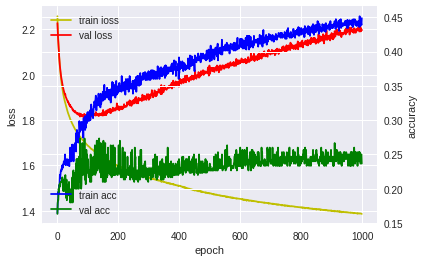

In [7]:
# 5. 학습과정 살펴보기

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(custom_hist.train_loss, 'y', label='train loss')
loss_ax.plot(custom_hist.val_loss, 'r', label='val loss')

acc_ax.plot(custom_hist.train_acc, 'b', label='train acc')
acc_ax.plot(custom_hist.val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()